In [0]:
%pip install imbalanced-learn

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier


In [0]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

In [0]:
data = pd.read_csv("C:/Users/gasho/Desktop/MLAI/Group-8-Credit-Card-Project1/credit_card_transactions.csv")
data.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [0]:
data.isnull().sum()/len(data)

Unnamed: 0               0.000000
trans_date_trans_time    0.000000
cc_num                   0.000000
merchant                 0.000000
category                 0.000000
amt                      0.000000
first                    0.000000
last                     0.000000
gender                   0.000000
street                   0.000000
city                     0.000000
state                    0.000000
zip                      0.000000
lat                      0.000000
long                     0.000000
city_pop                 0.000000
job                      0.000000
dob                      0.000000
trans_num                0.000000
unix_time                0.000000
merch_lat                0.000000
merch_long               0.000000
is_fraud                 0.000000
merch_zipcode            0.151135
dtype: float64

In [0]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [0]:
data["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<Axes: xlabel='Unnamed: 0', ylabel='is_fraud'>

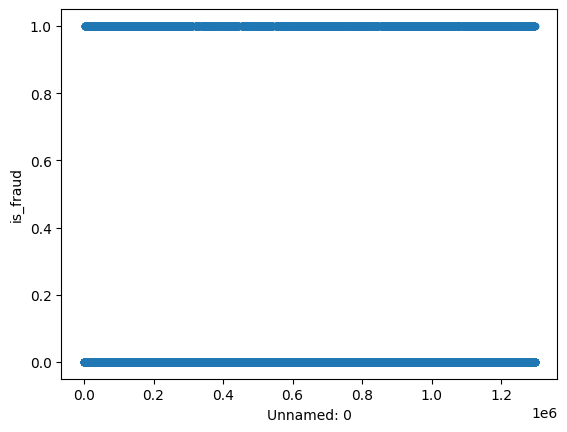

In [0]:
data.plot(kind='scatter', x='Unnamed: 0', y='is_fraud')

In [0]:
label_encoders = {}
for column in ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,115,381,1,602,468,13,83252,42.1808,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,163,463,1,930,84,26,59632,46.2306,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,336,149,1,418,216,45,24433,38.4207,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [0]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second

In [0]:
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

In [0]:
df = data.drop(columns=['Unnamed: 0','trans_date_trans_time', 'dob', 'trans_num','merch_zipcode'])
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,age
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18,31
1,630423337322,241,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44,41
2,38859492057661,390,0,220.11,115,381,1,602,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51,57
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,16,52
4,375534208663984,297,9,41.96,336,149,1,418,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,2019,1,1,0,3,6,33


In [0]:
df.isnull().sum()

cc_num          0
merchant        0
category        0
amt             0
first           0
last            0
gender          0
street          0
city            0
state           0
zip             0
lat             0
long            0
city_pop        0
job             0
unix_time       0
merch_lat       0
merch_long      0
is_fraud        0
trans_year      0
trans_month     0
trans_day       0
trans_hour      0
trans_minute    0
trans_second    0
age             0
dtype: int64

In [0]:
X=df.drop(columns=['is_fraud'])
y=df['is_fraud']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
X_train.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,age
458681,30153452207526,362,6,152.20,283,404,0,49,163,43,76834,31.8287,-99.4270,5908,385,1342909183,31.301510,-100.189398,2019,7,21,22,19,43,57
282534,4400011257587661852,97,6,73.74,228,345,0,483,584,29,68859,41.4972,-98.7858,509,311,1337438639,40.721395,-99.091821,2019,5,19,14,43,59,39
836287,502049568400,126,7,81.83,91,282,1,618,483,6,6444,41.7918,-72.7188,370,220,1355326972,42.027142,-72.700326,2019,12,12,15,42,52,57
350322,4089096483689733451,485,1,106.98,98,408,0,683,406,43,75662,32.3836,-94.8653,24536,300,1339610458,31.851799,-95.429840,2019,6,13,18,0,58,36
554505,630423337322,268,4,116.07,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,1345863956,48.300465,-117.869031,2019,8,25,3,5,56,41


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from imblearn.under_sampling import RandomUnderSampler
# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
X_under_esampled, y_under_resampled = rus.fit_resample(X_train, y_train)

In [0]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_overresampled, y_overresampled = random_oversampler.fit_resample(X_train, y_train)

In [0]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [0]:
# Fit the training data to the smote_sampler model
X_smote_sampled, y_smote_sampled = smote_sampler.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffdc2bed2d0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [0]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()

    }

In [0]:
def model_evaluation(X_train, y_train, X_test, y_test,flag):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_train_pred = model.predict(X_train)
        
        print(f"{model_name} {flag} Classification Report:")
    
        print('Train Model Score: %.3f' % model.score(X_train, y_train))
        print('Test Model Score: %.3f' %  model.score(X_test, y_test))    

        print(f"Test Accuracy Score :",accuracy_score(y_test, y_pred))
        print('Train Accuracy Score:', accuracy_score(y_train, y_train_pred))
             
        print('Balanced Train Accuracy Score:', balanced_accuracy_score(y_train, y_train_pred))
        print('Balanced Test Accuracy Score:', balanced_accuracy_score(y_test, y_pred))

        pred_probas = model.predict_proba(X_test)
        pred_probas_firsts = [prob[1] for prob in pred_probas]
        print('Test roc_auc_score',roc_auc_score(y_test, pred_probas_firsts))

        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
        cm_display.plot()
        plt.show()
    
           
        print(f"{model_name} {flag} Classification Report:")
        print(classification_report(y_test, y_pred))
         
        print("**********************************************************************")
    
    

Logistic Regression Original Classification Report:
Train Model Score: 0.994
Test Model Score: 0.994
Test Accuracy Score : 0.9936483747674824
Train Accuracy Score: 0.9936391137946706
Balanced Train Accuracy Score: 0.4997083414349601
Balanced Test Accuracy Score: 0.4997285011713235
Test roc_auc_score 0.8358935763459483


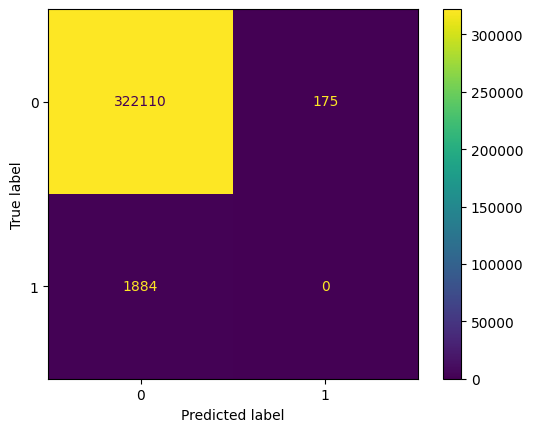

Logistic Regression Original Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    322285
           1       0.00      0.00      0.00      1884

    accuracy                           0.99    324169
   macro avg       0.50      0.50      0.50    324169
weighted avg       0.99      0.99      0.99    324169

**********************************************************************
Decision Tree Original Classification Report:
Train Model Score: 1.000
Test Model Score: 0.998
Test Accuracy Score : 0.9977141552708618
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.9083528101009883
Test roc_auc_score 0.9083528101009883


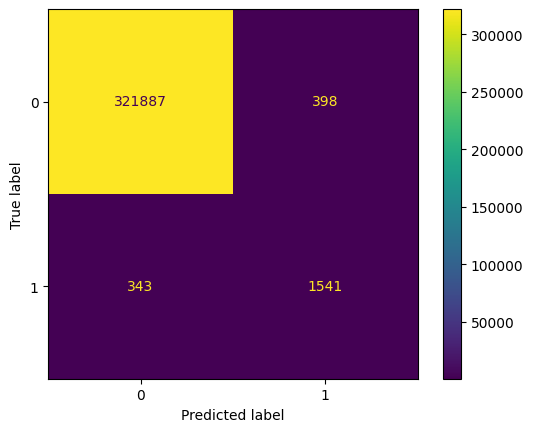

Decision Tree Original Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.79      0.82      0.81      1884

    accuracy                           1.00    324169
   macro avg       0.90      0.91      0.90    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Random Forest Original Classification Report:
Train Model Score: 1.000
Test Model Score: 0.998
Test Accuracy Score : 0.9984051528677943
Train Accuracy Score: 0.9999979434574182
Balanced Train Accuracy Score: 0.9998221273568125
Balanced Test Accuracy Score: 0.8701794901237174
Test roc_auc_score 0.988954665114059


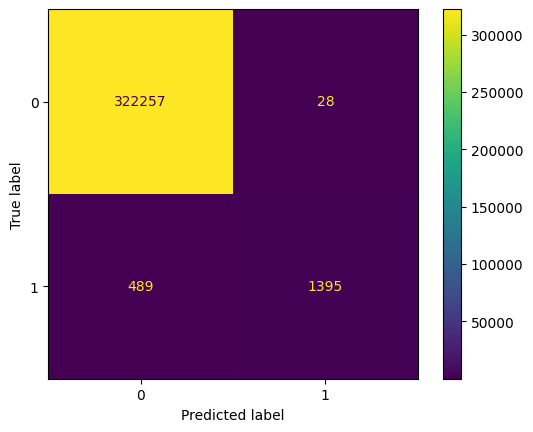

Random Forest Original Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.98      0.74      0.84      1884

    accuracy                           1.00    324169
   macro avg       0.99      0.87      0.92    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Gradient Boosting Original Classification Report:
Train Model Score: 0.998
Test Model Score: 0.998
Test Accuracy Score : 0.9978344628881849
Train Accuracy Score: 0.9978642805288604
Balanced Train Accuracy Score: 0.8477291051573845
Balanced Test Accuracy Score: 0.8440360238513163
Test roc_auc_score 0.9853337905581124


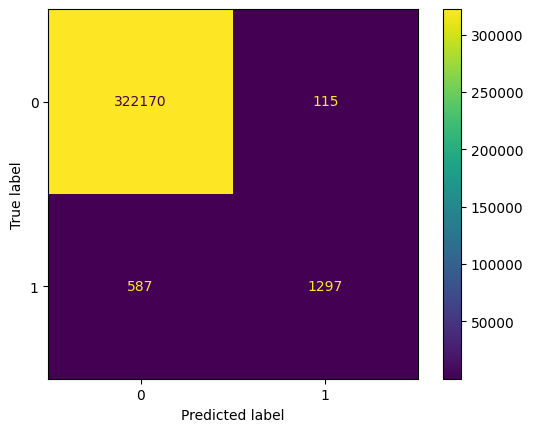

Gradient Boosting Original Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda9443f40>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.92      0.69      0.79      1884

    accuracy                           1.00    324169
   macro avg       0.96      0.84      0.89    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8a69c60>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

KNeighborsClassifier Original Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda9443f40>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Train Model Score: 0.997


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda9443f40>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Test Model Score: 0.996
Test Accuracy Score : 0.9960483574925425
Train Accuracy Score: 0.9966910229859764
Balanced Train Accuracy Score: 0.7370571657851728
Balanced Test Accuracy Score: 0.6948589065795999
Test roc_auc_score 0.8353016809013741


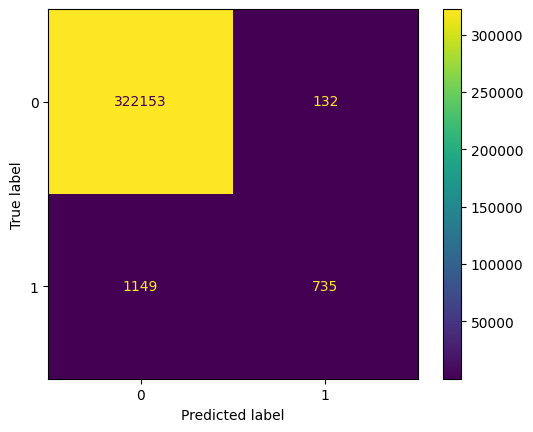

KNeighborsClassifier Original Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.85      0.39      0.53      1884

    accuracy                           1.00    324169
   macro avg       0.92      0.69      0.77    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Logistic Regression Under Sample Classification Report:
Train Model Score: 0.853
Test Model Score: 0.949
Test Accuracy Score : 0.9485731208104414
Train Accuracy Score: 0.8528103877623622
Balanced Train Accuracy Score: 0.8528103877623622
Balanced Test Accuracy Score: 0.8546161100438361
Test roc_auc_score 0.8637876805706017


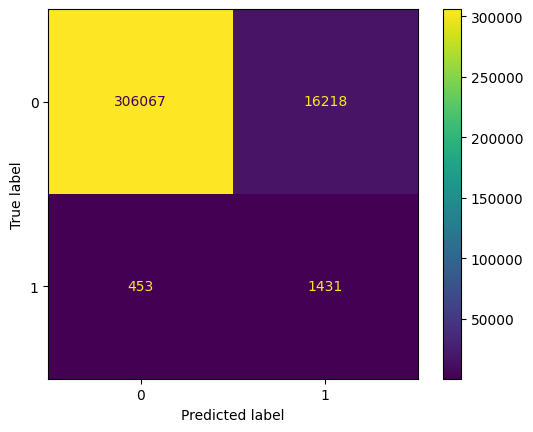

Logistic Regression Under Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    322285
           1       0.08      0.76      0.15      1884

    accuracy                           0.95    324169
   macro avg       0.54      0.85      0.56    324169
weighted avg       0.99      0.95      0.97    324169

**********************************************************************
Decision Tree Under Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.961
Test Accuracy Score : 0.9613411523001891
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.9586587481896371
Test roc_auc_score 0.9586587481896371


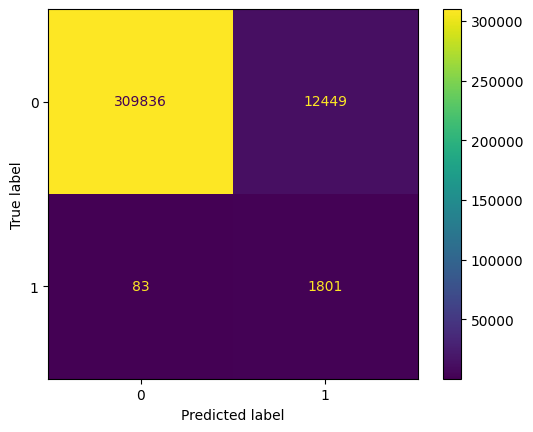

Decision Tree Under Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    322285
           1       0.13      0.96      0.22      1884

    accuracy                           0.96    324169
   macro avg       0.56      0.96      0.60    324169
weighted avg       0.99      0.96      0.98    324169

**********************************************************************
Random Forest Under Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.970
Test Accuracy Score : 0.9696485475168817
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.9638920927452514
Test roc_auc_score 0.9931804723285792


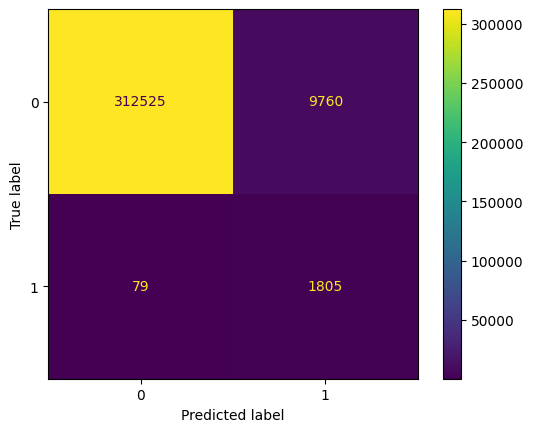

Random Forest Under Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    322285
           1       0.16      0.96      0.27      1884

    accuracy                           0.97    324169
   macro avg       0.58      0.96      0.63    324169
weighted avg       0.99      0.97      0.98    324169

**********************************************************************
Gradient Boosting Under Sample Classification Report:
Train Model Score: 0.969
Test Model Score: 0.970
Test Accuracy Score : 0.9702284919285928
Train Accuracy Score: 0.9690501600853789
Balanced Train Accuracy Score: 0.9690501600853789
Balanced Test Accuracy Score: 0.9673498563716023
Test roc_auc_score 0.9922319268985821


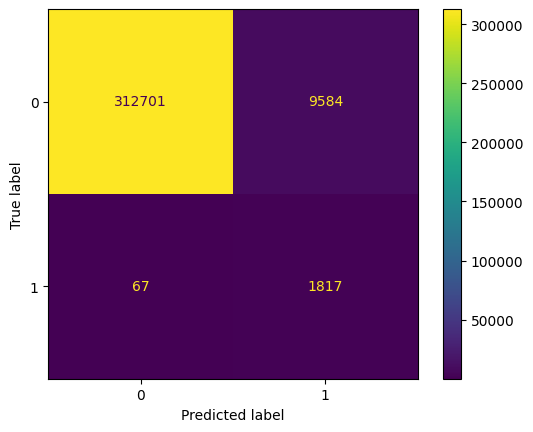

Gradient Boosting Under Sample Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffdc254ea70>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


              precision    recall  f1-score   support

           0       1.00      0.97      0.98    322285
           1       0.16      0.96      0.27      1884

    accuracy                           0.97    324169
   macro avg       0.58      0.97      0.63    324169
weighted avg       0.99      0.97      0.98    324169

**********************************************************************


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8ad1e10>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

KNeighborsClassifier Under Sample Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8ad1510>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Train Model Score: 0.910


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8ad1510>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Test Model Score: 0.881
Test Accuracy Score : 0.8814322159120705
Train Accuracy Score: 0.9103521878335112
Balanced Train Accuracy Score: 0.9103521878335112
Balanced Test Accuracy Score: 0.8572595204683436
Test roc_auc_score 0.9262379383125017


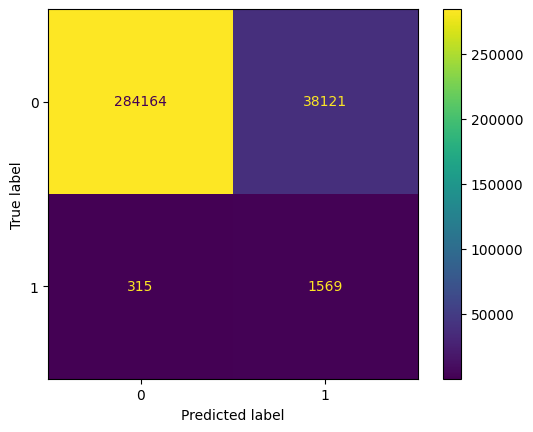

KNeighborsClassifier Under Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    322285
           1       0.04      0.83      0.08      1884

    accuracy                           0.88    324169
   macro avg       0.52      0.86      0.51    324169
weighted avg       0.99      0.88      0.93    324169

**********************************************************************
Logistic Regression Over Sample Classification Report:
Train Model Score: 0.852
Test Model Score: 0.946
Test Accuracy Score : 0.9456764835625862
Train Accuracy Score: 0.8524316257172525
Balanced Train Accuracy Score: 0.8524316257172525
Balanced Test Accuracy Score: 0.854478531697443
Test roc_auc_score 0.8644410202268851


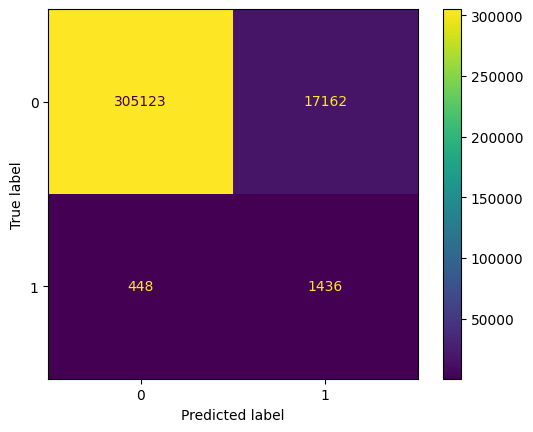

Logistic Regression Over Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    322285
           1       0.08      0.76      0.14      1884

    accuracy                           0.95    324169
   macro avg       0.54      0.85      0.56    324169
weighted avg       0.99      0.95      0.97    324169

**********************************************************************
Decision Tree Over Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.998
Test Accuracy Score : 0.9977943603490772
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.8938818723007195
Test roc_auc_score 0.8938818723007194


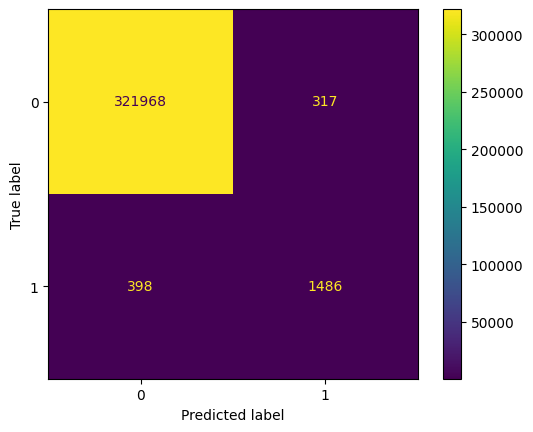

Decision Tree Over Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.82      0.79      0.81      1884

    accuracy                           1.00    324169
   macro avg       0.91      0.89      0.90    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Random Forest Over Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.999
Test Accuracy Score : 0.9985563085921233
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.8895159290347353
Test roc_auc_score 0.9937921607541849


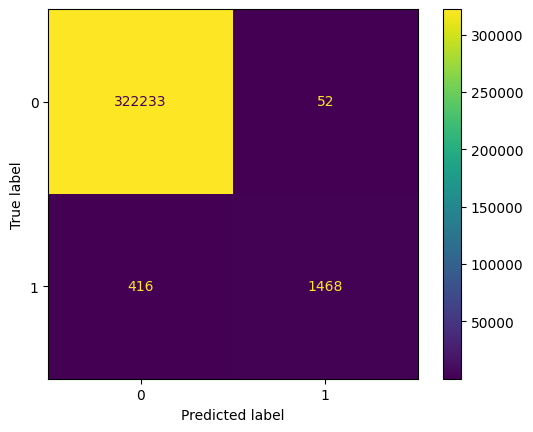

Random Forest Over Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.97      0.78      0.86      1884

    accuracy                           1.00    324169
   macro avg       0.98      0.89      0.93    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Gradient Boosting Over Sample Classification Report:
Train Model Score: 0.966
Test Model Score: 0.974
Test Accuracy Score : 0.9736927343453569
Train Accuracy Score: 0.9657761427430799
Balanced Train Accuracy Score: 0.9657761427430798
Balanced Test Accuracy Score: 0.963287593233126
Test roc_auc_score 0.9926542891528239


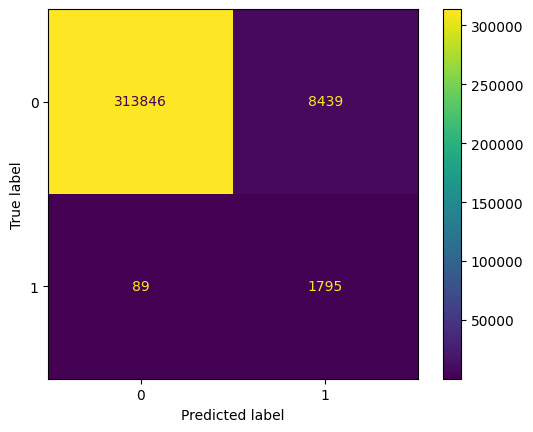

Gradient Boosting Over Sample Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffdc27b1ab0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


              precision    recall  f1-score   support

           0       1.00      0.97      0.99    322285
           1       0.18      0.95      0.30      1884

    accuracy                           0.97    324169
   macro avg       0.59      0.96      0.64    324169
weighted avg       0.99      0.97      0.98    324169

**********************************************************************


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8fb4670>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

KNeighborsClassifier Over Sample Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8fb4430>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Train Model Score: 0.998
Test Model Score: 0.993
Test Accuracy Score : 0.99300981895246
Train Accuracy Score: 0.9983736415123221


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda8fb4670>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Balanced Train Accuracy Score: 0.9983736415123221
Balanced Test Accuracy Score: 0.8199746085599554
Test roc_auc_score 0.8352766638118527


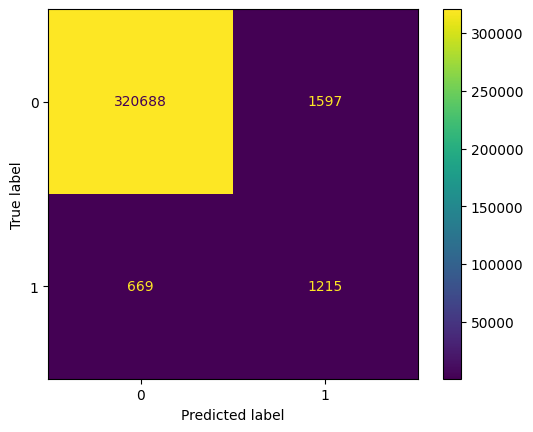

KNeighborsClassifier Over Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.43      0.64      0.52      1884

    accuracy                           0.99    324169
   macro avg       0.71      0.82      0.76    324169
weighted avg       0.99      0.99      0.99    324169

**********************************************************************
Logistic Regression Smote Sample Classification Report:
Train Model Score: 0.853
Test Model Score: 0.943
Test Accuracy Score : 0.9428908994999522
Train Accuracy Score: 0.8528965211959242
Balanced Train Accuracy Score: 0.8528965211959243
Balanced Test Accuracy Score: 0.8546606458981015
Test roc_auc_score 0.86426769412298


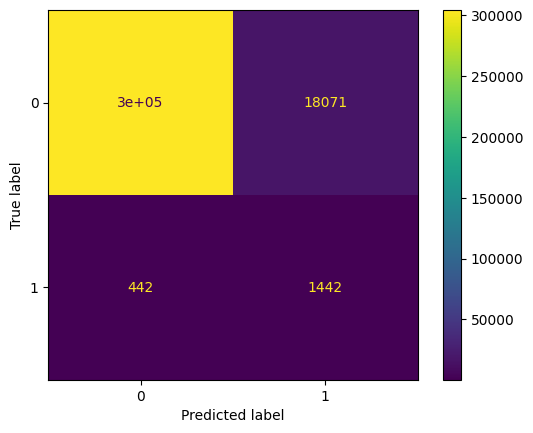

Logistic Regression Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    322285
           1       0.07      0.77      0.13      1884

    accuracy                           0.94    324169
   macro avg       0.54      0.85      0.55    324169
weighted avg       0.99      0.94      0.97    324169

**********************************************************************
Decision Tree Smote Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.996
Test Accuracy Score : 0.9963784322375058
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.9050426308333668
Test roc_auc_score 0.9050426308333669


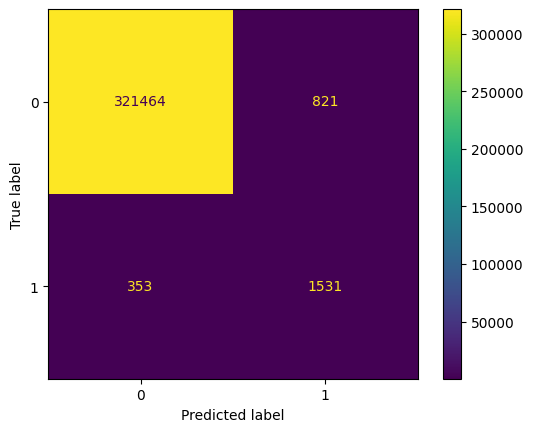

Decision Tree Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.65      0.81      0.72      1884

    accuracy                           1.00    324169
   macro avg       0.82      0.91      0.86    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Random Forest Smote Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.998
Test Accuracy Score : 0.9982385730899623
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.8904114980190385
Test roc_auc_score 0.992888594206569


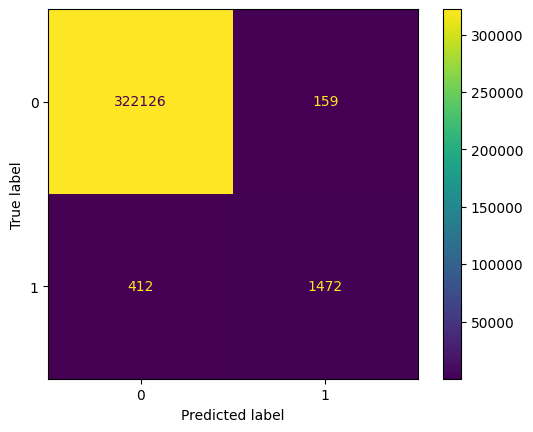

Random Forest Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.90      0.78      0.84      1884

    accuracy                           1.00    324169
   macro avg       0.95      0.89      0.92    324169
weighted avg       1.00      1.00      1.00    324169

**********************************************************************
Gradient Boosting Smote Sample Classification Report:
Train Model Score: 0.958
Test Model Score: 0.973
Test Accuracy Score : 0.9728783443204008
Train Accuracy Score: 0.9582374928119609
Balanced Train Accuracy Score: 0.9582374928119609
Balanced Test Accuracy Score: 0.937285405991789
Test roc_auc_score 0.9813347585663108


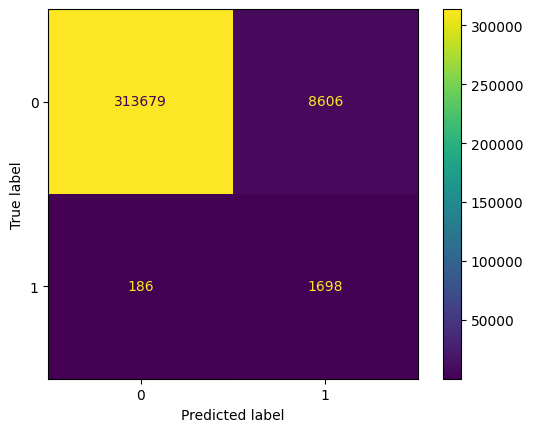

Gradient Boosting Smote Sample Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffdc25195a0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


              precision    recall  f1-score   support

           0       1.00      0.97      0.99    322285
           1       0.16      0.90      0.28      1884

    accuracy                           0.97    324169
   macro avg       0.58      0.94      0.63    324169
weighted avg       0.99      0.97      0.98    324169

**********************************************************************


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffdc25195a0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

KNeighborsClassifier Smote Sample Classification Report:


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda772beb0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Train Model Score: 0.996
Test Model Score: 0.987
Test Accuracy Score : 0.9871270849464323
Train Accuracy Score: 0.9962860074217796


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xfffda772be20>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Balanced Train Accuracy Score: 0.9962860074217796
Balanced Test Accuracy Score: 0.8465662792953988
Test roc_auc_score 0.8671708705423425


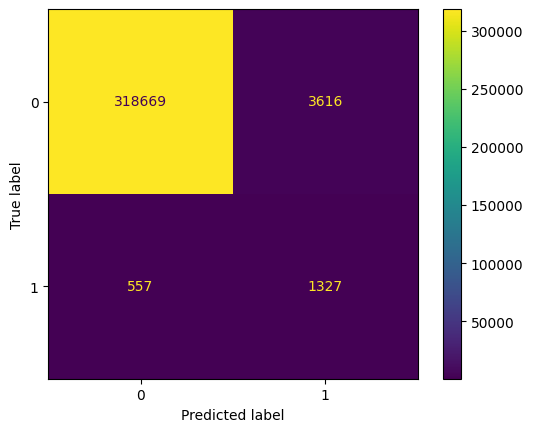

KNeighborsClassifier Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    322285
           1       0.27      0.70      0.39      1884

    accuracy                           0.99    324169
   macro avg       0.63      0.85      0.69    324169
weighted avg       0.99      0.99      0.99    324169

**********************************************************************


In [0]:
model_evaluation(X_train, y_train, X_test, y_test,"Original")
model_evaluation(X_under_esampled, y_under_resampled, X_test, y_test,"Under Sample")
model_evaluation(X_overresampled, y_overresampled, X_test, y_test,"Over Sample")
model_evaluation(X_smote_sampled, y_smote_sampled, X_test, y_test,"Smote Sample")


In [0]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [0]:
rf_model = rf_model.fit(X_train, y_train)

In [0]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

In [0]:
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:15]

[(0.3759260103354944, 'amt'),
 (0.13181400512788777, 'category'),
 (0.10628485150466051, 'trans_hour'),
 (0.05130436331082666, 'age'),
 (0.029278088478191102, 'unix_time'),
 (0.023155932150728687, 'merch_lat'),
 (0.02301196432295552, 'city_pop'),
 (0.022935309755122216, 'merch_long'),
 (0.020955708127628737, 'merchant'),
 (0.019566328659207707, 'trans_day'),
 (0.017252964423050552, 'trans_second'),
 (0.016779072744085376, 'trans_minute'),
 (0.01577378330085833, 'job'),
 (0.01569473594398945, 'street'),
 (0.014581552344983088, 'city')]